# Data Mining

## Tugas 3: Regresi Linear

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas3_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat beberapa *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**NIM: 20102038**

**Nilai akhir: XX/60**

### Import

In [1]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline

plt.style.use('bmh')
warnings.filterwarnings('ignore')

RANDOM_STATE = 1337

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


### Deskripsi Dataset

Diabetes dataset
================

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:
- Number of Instances: 442
- Number of Attributes: First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline
- Attributes:
    - :Age:
    - :Sex:
    - :Body mass index:
    - :Average blood pressure:
    - :S1:
    - :S2:
    - :S3:
    - :S4:
    - :S5:
    - :S6:

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

## 1. Eksplorasi Awal Data (20 poin)

Sebelum menerapkan model regresi, Anda diminta untuk mengeksplorasi atribut dan label yang akan digunakan dalam tugas ini.

### Soal 1.1 (6 poin)

Gambarkan histogram untuk `age`, `bmi`, dan `bp`. Gambarkan juga kurva distribusi Gaussian yang dicocokkan dengan tiap atribut tersebut.

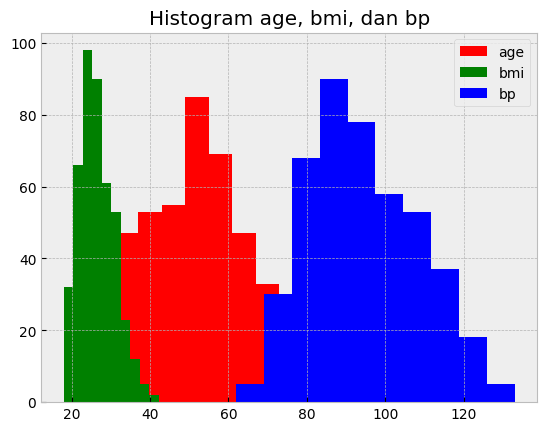

In [3]:
plt.hist(df['age'], color='red')
plt.hist(df['bmi'], color='green')
plt.hist(df['bp'], color='blue')


plt.legend(['age', 
            'bmi'
            ,'bp'])

plt.title("Histogram age, bmi, dan bp")

plt.show()

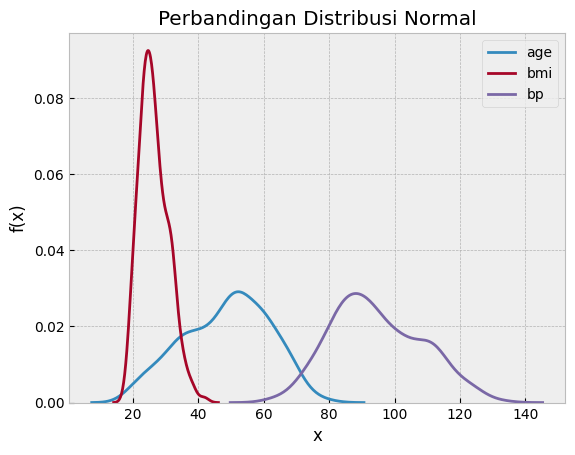

In [4]:
kolom_banding = df[['age', 'bmi', 'bp']]

for column in kolom_banding:
    sns.kdeplot(df[column], label=column)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Perbandingan Distribusi Normal')
plt.legend()
plt.show()

### Soal 1.2 (2 poin)

Gambarkan bar plot untuk `sex`.

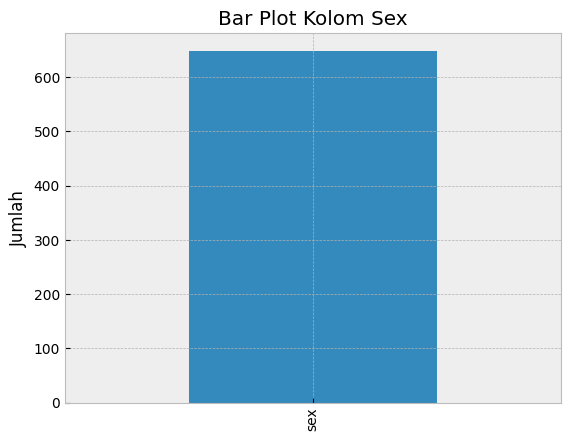

In [5]:
kolom_plot = df[['sex']]
kolom_sum = kolom_plot.sum()

kolom_sum.plot(kind='bar')
plt.ylabel('Jumlah')
plt.title('Bar Plot Kolom Sex')
plt.grid(True)
plt.show()

### Soal 1.3.a (2 poin)

Karena kita mungkin akan kesulitan memahami atribut `s1`-`s6`, coba gambarkan dalam bentuk joint plot.

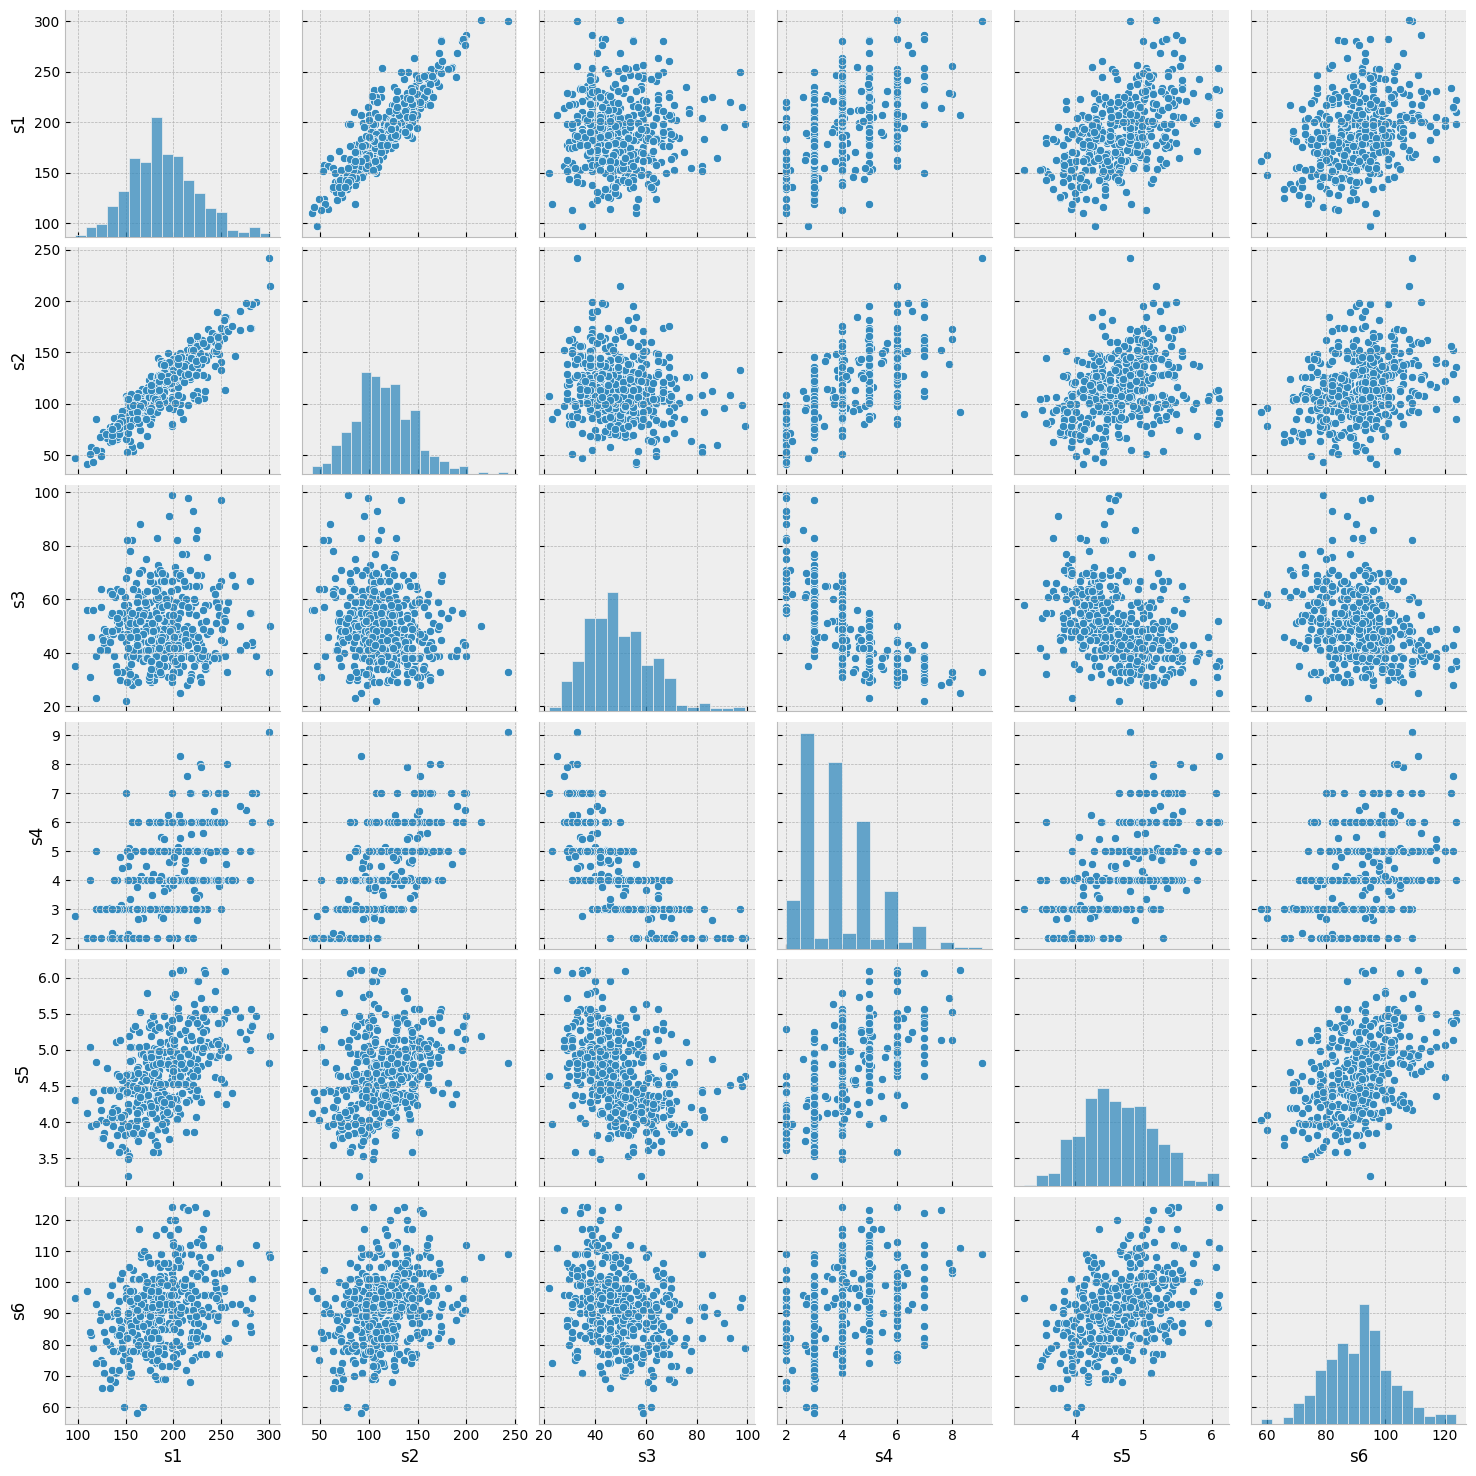

In [6]:
kolom_plot = df[['s1', 's2', 's3', 's4', 's5', 's6']]

sns.pairplot(kolom_plot)
plt.show()

### Soal 1.3.b (3 poin)

Gambarkan juga *correlation heatmap* dari keenam nilai serum tersebut. Apakah ada pola menarik yang Anda temukan?

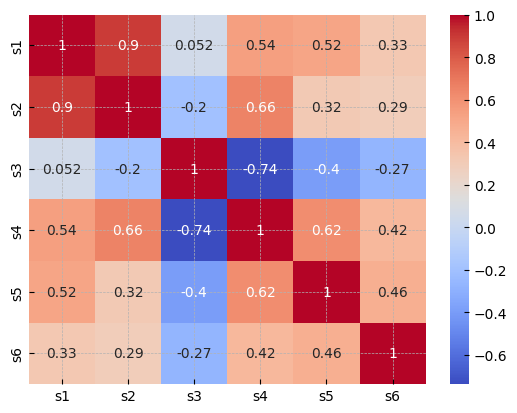

In [7]:
kolom_plot = df[['s1', 's2', 's3', 's4', 's5', 's6']]  
korelasi_antar_kolom = kolom_plot.corr()

sns.heatmap(korelasi_antar_kolom, annot = True, cmap = 'coolwarm')
plt.show()

Serum 3 (s3) memiliki hubungan yang lemah dengan atribut-atribut serum yang lain.
Serum 1 dan 2 (s1 dan s2) memiliki hubungan yang kuat dengan atribut serum yang lain. s1 dan s2 juga memiliki hubungan yang kuat satu sama lain, ditandai dengan nilainya mencapai 0.9.

### Soal 1.4 (3 poin)

Gambarkan *correlation heatmap* untuk semua atribut dan label dari data yang diberikan. Apa yang dapat Anda amati?

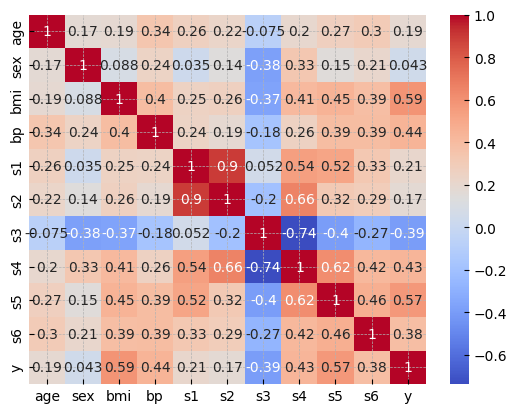

In [8]:
atribut = df.iloc[:, :-1]
label = df.iloc[:, -1]

data_all = pd.concat([atribut, label], axis = 1)
korelasi_all= data_all.corr()

sns.heatmap(korelasi_all, annot = True, cmap = 'coolwarm')
plt.show()

Serum 3 (s3) memiliki hubungan yang paling lemah dari semua atribut dan label. Serum 1 dan 2 (s1 dan s2) memiliki hubungan yang kuat satu sama lain, ditandai dengan nilai 0.9. Atribut sex memiliki hubungan yang lemah dengan label dan atribut yang lain, maka dari itu jenis kelamin (sex) tidak mempengaruhi diabetes. Atribut bmi memiliki hubungan yang kuat dengan atribut dan label.

### Soal 1.4.b (2 poin)

Anda mungkin melihat bahwa salah satu atribut yang berkorelasi cukup kuat dengan label yang digunakan adalah `bmi`. Coba gambarkan *scatter plot* dengan menggunakan `bmi` sebagai sumbu horizontal dan `y` sebagai sumbu vertikal.

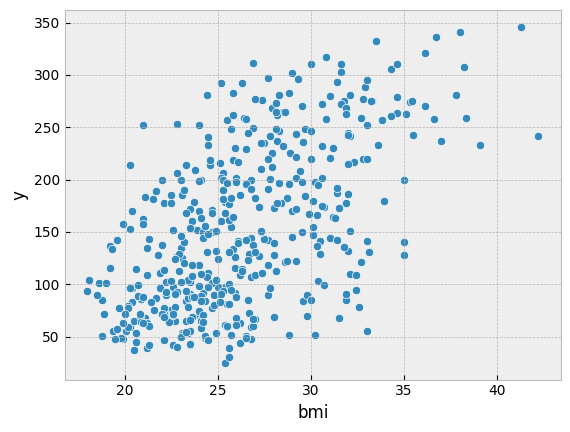

In [9]:
atribut = df['bmi']
label = df['y']

sns.scatterplot(x=atribut, y=label)
plt.show()

### Soal 1.5 (2 poin)

Gambarkan histogram dari label yang Anda gunakan agar dapat lebih memahami kasus yang Anda akan tangani. Laporkan juga *summary statistics*-nya.

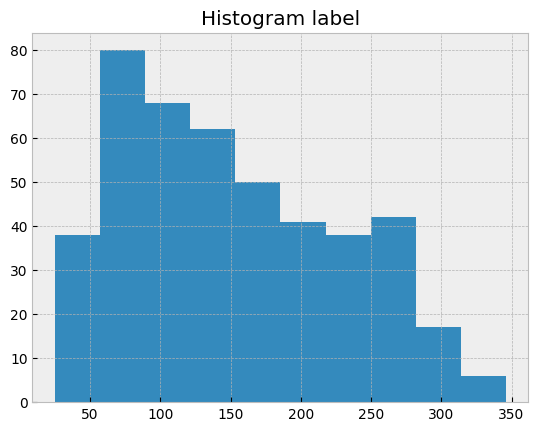

Min: 25
Max: 346
Mean: 152.13348416289594
Median: 140.5
Std Dev: 77.00574586945044


In [10]:
x = df['y']

plt.hist(x)
plt.title("Histogram label")
plt.show()

summary_stats = {
    'Min': np.min(x),
    'Max': np.max(x),
    'Mean': np.mean(x),
    'Median': np.median(x),
    'Std Dev': np.std(x),
}

for stat, nilai in summary_stats.items():
    print(f'{stat}: {nilai}')

### Soal 1.6 (2 poin)

Bagi dataset Anda menjadi 70% data latih dan 30% data uji dengan menggunakan `train_test_split()`.

In [11]:
atribut = df.iloc[:, :-1]
label = df.iloc[:, -1]

#atribut dan label dibagi ke train dan test
train_atribut, test_atribut, train_label, test_label = train_test_split(
    atribut, label, test_size = 0.3, random_state = 42)

print("jumlah data latih = ", len(train_atribut))
print("jumlah data uji = ", len(test_atribut))

jumlah data latih =  309
jumlah data uji =  133


## 2. Regresi Linear (40 poin)

Anda diminta untuk melakukan regresi pada dataset yang telah diberikan. Tentu akan sangat baik jika Anda bisa memahami label yang akan diprediksi. Namun, dalam tugas ini, Anda tidak perlu berfokus pada interpretasi dari label dan prediksinya. Anda hanya diminta untuk menjelaskan hasil eksplorasi Anda dengan *benchmark* yang ditetapkan di awal.

### Soal 2.1.a (3 poin)

Lakukan 5-fold cross validation pada data latih dengan menggunakan algoritma `LinearRegression` dengan fitur `bmi` saja. Laporkan nilai rata-rata *root-mean-square error* (RMSE) dari 5-fold CV tersebut.

In [12]:
atribut = df[['bmi']]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

rmse_scores = []

for train_index, test_index in kfold.split(df):
    train_atribut, test_atribut = atribut.iloc[train_index], atribut.iloc[test_index]
    
    model.fit(train_atribut, train_atribut)  # Model latih dengan atribut latih
    test_predict = model.predict(test_atribut)
    mse = mean_squared_error(test_atribut, test_predict)
    rmse = mse ** 0.5
    rmse_scores.append(rmse)

rata_rata_rmse = sum(rmse_scores) / len(rmse_scores)
print("Rata-rata skor RMSE: ", rata_rata_rmse)

Rata-rata skor RMSE:  1.6703635034695654e-15


### Soal 2.1.b (2 poin)

Lakukan hal yang sama seperti pada soal 2.1.a, tapi kali ini dengan semua fitur yang ada. Laporkan kembali RMSE-nya.

In [13]:
atribut = df.iloc[:, :-1]
label = df.iloc[:, -1]

#atribut dan label dibagi ke train dan test
train_atribut, test_atribut, train_label, test_label = train_test_split(
    atribut, label, test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(train_atribut, train_label)

prediksi_uji = model.predict(test_atribut)
mse = mean_squared_error(test_label, prediksi_uji)
rmse = mse ** 0.5

print("Skor RMSE: ", rmse)

Skor RMSE:  53.12015607094272


### Soal 2.2.a (6 poin)

Apakah kita bisa menghasilkan model yang lebih baik? Sekarang coba lakukan regresi dengan fungsi basis polinomial. Gunakan nilai polinomial $p \in [1,5]$. Gambarkan RMSE dari 5-fold CV dengan berbagai nilai transformasi polinomial tersebut dalam bentuk *line plot*.

In [73]:
# Mengambil atribut dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Pembagian atribut dan nilai ke dalam train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menyimpan skor RMSE ke dalam list
total_nilai_rmse = []

# Inisialisasi objek KFold dengan 5 fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterasi untuk setiap nilai derajat polinomial (1-5)
for degree in range(1, 6):
    # Membuat fitur polinomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    # Inisialisasi list untuk menyimpan skor RMSE setiap fold
    rmse_fold = []

    # Melakukan k-fold cross-validation
    for train_index, test_index in kfold.split(X_train_poly):
        # Membagi data menjadi data latih dan data uji berdasarkan indeks fold
        X_train_fold, X_test_fold = X_train_poly[train_index], X_train_poly[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Melatih model regresi
        model = LinearRegression()
        model.fit(X_train_fold, y_train_fold)

        # Melakukan prediksi pada data uji atribut
        y_test_fold_predict = model.predict(X_test_fold)

        # Menghitung RMSE pada fold
        mse = mean_squared_error(y_test_fold, y_test_fold_predict)
        rmse = np.sqrt(mse)

        # Menyimpan skor RMSE pada fold
        rmse_fold.append(rmse)

    # Menghitung rata-rata skor RMSE dari k-fold CV
    avg_rmse = np.mean(rmse_fold)

    # Menyimpan rata-rata skor RMSE ke dalam list
    total_nilai_rmse.append(avg_rmse)

# Menampilkan skor RMSE untuk setiap nilai derajat polinomial
for degree, rmse in enumerate(total_nilai_rmse, start=1):
    print(f"Skor RMSE (degree = {degree}): {rmse}")


Skor RMSE (degree = 1): 56.73596841303238
Skor RMSE (degree = 2): 74.87382037491727
Skor RMSE (degree = 3): 4837.385887693107
Skor RMSE (degree = 4): 1022.8629301304558
Skor RMSE (degree = 5): 1065.9853497666106


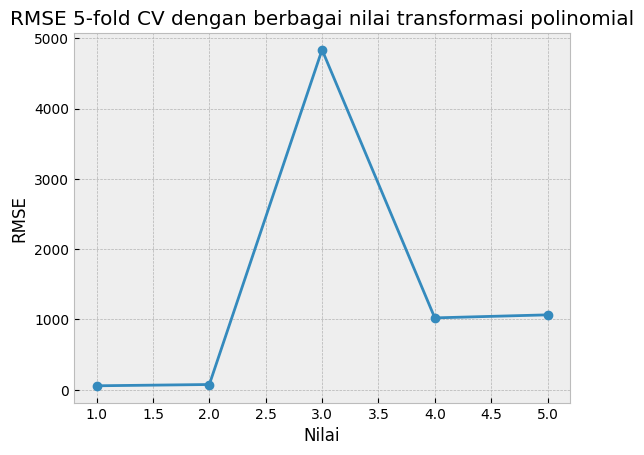

In [64]:
# Menampilkan hasil skor RMSE pada line plot
plt.plot(range(1, 6), total_nilai_rmse, marker='o')
plt.xlabel('Nilai')
plt.ylabel('RMSE')
plt.title('RMSE 5-fold CV dengan berbagai nilai transformasi polinomial')
plt.show()

### Soal 2.2.b (1 poin)

Berdasarkan grafik yang telah Anda buat pada soal 2.2.a, berapa nilai $p$ yang terbaik?

Untuk nilai p terbaik pada soal 2.2.a, ada pada nilai p = 1. Hal tersebut dikarenakan nilai p = 1 memiliki nilai RMSE yang terendah, yaitu 56.7360. Nilai yang terburuk ada pada p = 3, yaitu 4837.3859

### Soal 2.2.c (3 poin)

Dari model yang terbaik tersebut, gambarkan nilai koefisien untuk masing-masing atribut dalam bentuk *bar plot*.

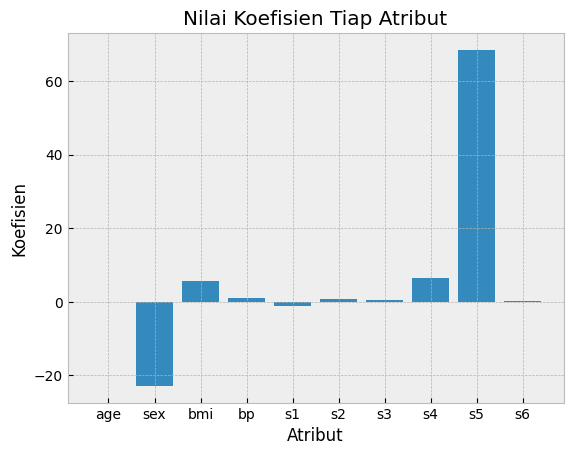

In [60]:
# Memisahkan atribut dan label
X = df.iloc[:, :-1]  # Atribut
y = df.iloc[:, -1]   # Label

# Mengubah atribut menjadi polynomial features
polynomial_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = polynomial_features.fit_transform(X)

# Melakukan pelatihan model Linear Regression
model = LinearRegression()

# Melakukan pelatihan model
model.fit(X, y)

# Mengambil koefisien atribut dari model
koefisien = model.coef_

# Menampilkan nilai koefisien tiap kolom dalam bar plot
plt.bar(X.columns, koefisien) # terdapat nilai yang negatif pada koefisien
plt.xlabel('Atribut')
plt.ylabel('Koefisien')
plt.title('Nilai Koefisien Tiap Atribut')
plt.show()

### Soal 2.3.a (2 poin)

Lakukan hal yang sama seperti pada soal 2.2.a, tapi ganti algoritma regresi yang digunakan dengan `Ridge`.

In [72]:
# Mengambil atribut dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Pembagian atribut dan nilai ke dalam train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menyimpan skor RMSE ke dalam list
total_nilai_rmse = []

# Inisialisasi objek KFold dengan 5 fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterasi untuk setiap nilai derajat polinomial (1-5)
for degree in range(1, 6):
    # Membuat fitur polinomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    # Inisialisasi list untuk menyimpan skor RMSE setiap fold
    rmse_fold = []

    # Melakukan k-fold cross-validation
    for train_index, test_index in kfold.split(X_train_poly):
        # Membagi data menjadi data latih dan data uji berdasarkan indeks fold
        X_train_fold, X_test_fold = X_train_poly[train_index], X_train_poly[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Melatih model Ridge
        modelRidge = Ridge()
        modelRidge.fit(X_train_fold, y_train_fold)

        # Melakukan prediksi pada data uji atribut
        y_test_fold_predict = modelRidge.predict(X_test_fold)

        # Menghitung RMSE pada fold
        mse = mean_squared_error(y_test_fold, y_test_fold_predict)
        rmse = np.sqrt(mse)

        # Menyimpan skor RMSE pada fold
        rmse_fold.append(rmse)

    # Menghitung rata-rata skor RMSE dari k-fold CV
    avg_rmse = np.mean(rmse_fold)

    # Menyimpan rata-rata skor RMSE ke dalam list
    total_nilai_rmse.append(avg_rmse)

# Menampilkan skor RMSE untuk setiap nilai derajat polinomial
for degree, rmse in enumerate(total_nilai_rmse, start=1):
    print(f"Skor RMSE (degree = {degree}): {rmse}")


Skor RMSE (degree = 1): 56.70601823095676
Skor RMSE (degree = 2): 69.45397913981853
Skor RMSE (degree = 3): 823.2917231861422
Skor RMSE (degree = 4): 972.9518319221518
Skor RMSE (degree = 5): 1079.5488294390798


### Soal 2.3.b (3 poin)

Berdasarkan hasil yang Anda dapatkan, perbedaan apa yang dapat Anda amati? Menurut Anda, mengapa hasilnya bisa seperti itu?

Pada LinearRegression, skor RMSE polynomial dari 1-5 terbilang tinggi, contohnya pada derajat ke 3, yang bernilai lebih dari 4000. Hal tersebut menandakan model mengalami overfitting. Saat menggunakan Ridge, karena memiliki regularisasi L2, overfitting model tidak terlalu parah.

### Soal 2.4.a (2 poin)

Apa fungsi regularisasi seperti pada *ridge* dan *lasso regression*?

Fungsi regularisasi pada *ridge* dan *lasso regression* adalah untuk mengontrol kompleksitas model yang dihasilkan. Regularisasi juga digunakan untuk menghindari overfitting.

### Soal 2.4.b (2 poin)

*Loss function* dengan regularisasi $L_2$ didefinisikan sebagai
$$
O(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 - \alpha \|\mathbf{w}\|_2^2
$$
Apa yang terjadi saat $\alpha \rightarrow 0$ dan $\alpha \rightarrow \infty$?

Jika $\alpha \rightarrow 0$, maka regularisasi tidak memiliki pengaruh pada loss function, sehingga dapat menyebabkan overfitting dan memiliki nilai koefisien yang lebih besar.

Jika $\alpha \rightarrow \infty$, maka nilai koefisien akan menjadi kecil mendekati 0, sehingga dapat menyebabkan underfitting.

### Soal 2.5.a (4 poin)

Dari model terbaik yang Anda dapatkan tersebut, lakukan prediksi pada data uji, lalu laporkan RMSE-nya.

In [76]:
# Membuat fitur polinomial pada data uji
X_test_poly = poly.transform(X_test)

# Melakukan prediksi pada data uji menggunakan model Ridge
y_test_pred = modelRidge.predict(X_test_poly)

# Menghitung RMSE pada data uji
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Menampilkan skor RMSE pada data uji
print(f"Skor RMSE pada data uji: {test_rmse:.4f}")

Skor RMSE pada data uji: 653.0915


### Soal 2.5.b (4 poin)

Gambarkan *residual plot* dari prediksi yang dilakukan pada data uji dengan sumbu horizontal adalah $\hat{y}$ dan sumbu vertikal adalah residualnya. Jangan lupa untuk memberikan label pada tiap sumbu. Apa yang dapat Anda amati?

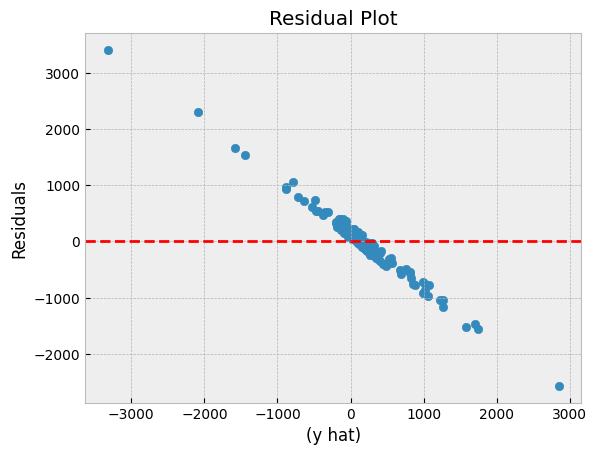

In [77]:
# Menghitung residual (selisih antara nilai aktual dan prediksi)
residual = y_test - y_test_pred

# Membuat residual plot
plt.scatter(y_test_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('(y hat)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Seharusnya residual plot tidak menunjukkan pola. Residual seharusnya acak dan tersebar di sumbu nol. Hal ini menunjukkan model belum dapat menangkap pola dalam data.

### Soal 2.6 (2 poin)

Pada dasarnya, kita dapat menggunakan optimasi analitis untuk mendapatkan solusi tertutup dari regresi linear. Sebagai alternatif, apakah kita dapat menggunakan optimasi numerik seperti *gradient descent*? Jika ya, apakah hasil optimasinya akan sama? Berikan alasannya. Jika tidak, apa yang menyebabkan hasilnya tidak akan sama?

Tidak, karena hasil dari kedua optimasi analitis dan numerik memiliki pendekatan dan metode yang cukup berbeda. Analitis menggunakan persamaan matematika, sedangkan numerik menggunakan metode iterasi. Namun, jika pengaturan dan jumlah iterasi pada optimasi numerik tepat, maka hasilnya bisa mendekati optimasi analitis.

### Soal 2.7 (2 poin)

Dalam eksplorasi ini, Anda diminta menggunakan RMSE sebagai *evaluation metrics*. Kapan Anda dapat menggunakan *metrics* alternatif seperti *mean absolute error* (MAE)? Apa keuntungannya?

Jika pada data terdapat outlier, MAE dapat digunakan karena MAE lebih tahan terhadap outlier. Jika data berukuran besar, penggunaan MAE juga lebih optimal dikarenakan kecepatan menghitung MAE lebih cepat dibandingkan RMSE. MAE juga dapat interpretasikan dengan lebih mudah, sehingga orang awam lebih mudah memahaminya.

### Soal 2.8 (4 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah dilakukan.

Skor RMSE pada data latih dengan menggunakan LinearRegression mendapatkan hasil yang kurang bagus, dikarenakan RMSE pada derajat polinomial = 3 memiliki hasil yang overfit. Sedangkan dengan menggunakan Ridge, hasil skor RMSE terlihat lebih rendah, karena Ridge menggunakan regularisasi L2 untuk menangani outlier. Setelah dilakukan pengujian menggunakan residual plot, hasil menunjukan model masih kurang baik, karena seharusnya hasil residual plot tidak membentuk pola.